# Genesis Module 2: The Physics of Inflation
## Part 1: The Unregulated Economy

**Objective:**
Simulate the "Natural State" of an MMO economy.
In most games, monsters print infinite money (Faucets), but players have limited things to buy (Sinks).

**The Equation:**
$$\Delta Money = \text{Income (Kills)} - \text{Sinks (Repairs/Tax)}$$

**Hypothesis:**
Without active regulation, the Money Supply will grow exponentially, making the currency worthless within 100 days.

In [1]:
import sys
import os
import matplotlib.pyplot as plt
import pandas as pd

# Add the 'src' directory to the path so we can import our engine
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

from src.economy import Economy

# Initialize a World with 1 Million Gold
world = Economy(start_money=1_000_000, start_tax=0.05)

print(f"Initial World State: {world.money_supply:,.0f} Gold")
print(f"Fixed Tax Rate: {world.tax_rate:.1%}")

Initial World State: 1,000,000 Gold
Fixed Tax Rate: 5.0%


In [2]:
# Simulation Parameters
DAYS = 100
daily_income = 10_000  # Players kill monsters and generate 10k Gold/Day
history = []

print("📉 STARTING SIMULATION (No AI Regulation)...")

for day in range(DAYS):
    # 1. The Faucet: Money enters the system
    world.inject_money(daily_income)

    # 2. The Sink: Players trade and pay tax
    # Assumption: 10% of the money supply changes hands every day
    trade_volume = world.money_supply * 0.10
    world.transaction(trade_volume)

    # 3. Record Data
    history.append({
        "Day": day,
        "Money Supply": world.money_supply
    })

print(f"✅ Day {DAYS} Complete. Final Money: {world.money_supply:,.0f}")

📉 STARTING SIMULATION (No AI Regulation)...
✅ Day 100 Complete. Final Money: 1,390,287


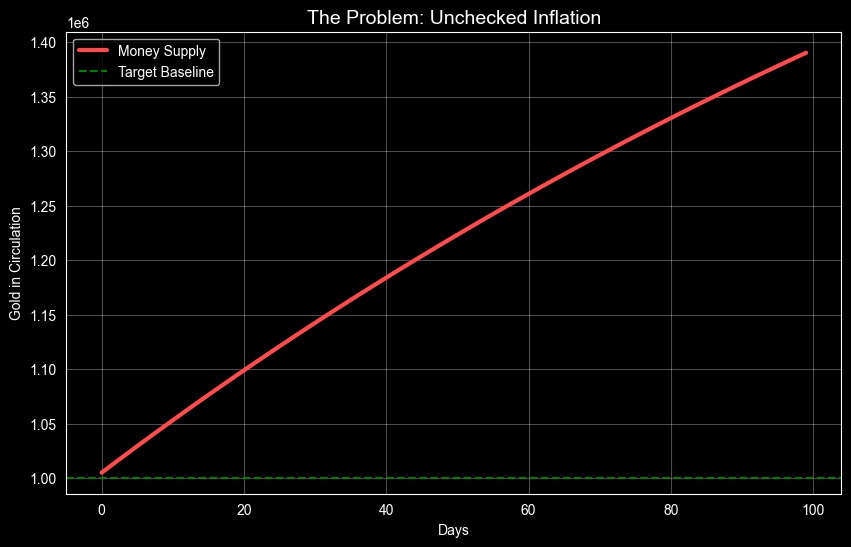

In [3]:
# Visualize the Inflation Curve
df = pd.DataFrame(history)

plt.figure(figsize=(10, 6))
plt.plot(df['Day'], df['Money Supply'], color='#ff4b4b', linewidth=3, label='Money Supply')
plt.axhline(y=1_000_000, color='green', linestyle='--', label='Target Baseline')

plt.title("The Problem: Unchecked Inflation", fontsize=14)
plt.ylabel("Gold in Circulation")
plt.xlabel("Days")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

### **Conclusion:**
As hypothesized, the economy is broken.
Even with a fixed 5% tax, the continuous injection of new money (Daily Income) caused the supply to drift away from the target.

**Next Step:**
We need to introduce an **Active Controller** (Central Bank AI) that can adjust the Tax Rate dynamically to force this line back down to the Green Target.